In [119]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pf
import seaborn as sns

from keras.models import Model
from PIL import Image
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input

In [133]:
model = tf.keras.models.load_model("model.h5")

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024      
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0

In [135]:
model_in = model.input
model_layer = model.layers
layer_names = [layer.name for layer in model.layers]
model_layer_output = [layer.output for layer in model_layer]

for(i, item) in enumerate(layer_names, start=0):
    print(i, item)

0 conv0
1 bn0
2 activation
3 max0
4 conv1
5 bn1
6 activation_1
7 max1
8 conv2
9 bn2
10 activation_2
11 conv3
12 bn3
13 activation_3
14 conv4
15 bn4
16 activation_4
17 max2
18 flatten
19 fc0
20 fc1
21 dense
22 fc2


In [136]:
feature_model = Model(inputs=model_in, outputs= model_layer_output)
tf.keras.utils.plot_model(feature_model, 'sample.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [122]:
#feature_model.summary()

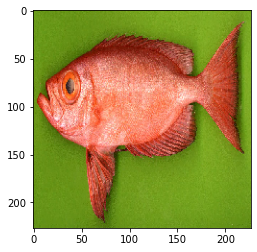

In [139]:
from tensorflow.keras.utils import load_img, img_to_array
image_path ='fish.jpg'
img = load_img(image_path, target_size=(227, 227))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [140]:
extracted_features = feature_model(x)

f1.shape:  (1, 55, 55, 96) Layer:  conv0


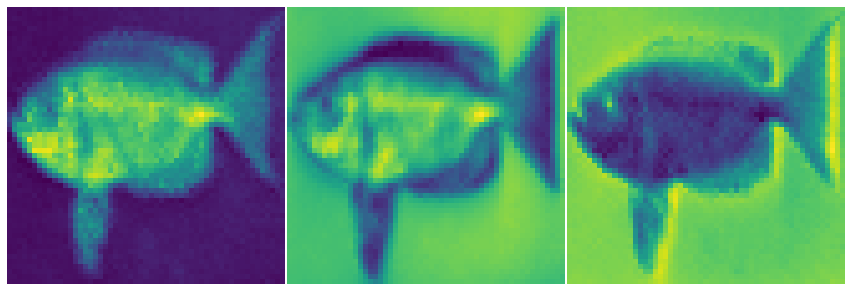

In [141]:
f1 = extracted_features[0]
print('f1.shape: ', f1.shape, 'Layer: ', layer_names[0])
imgs=f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

0 Layer:  conv0 Layer shape:  (1, 55, 55, 96)


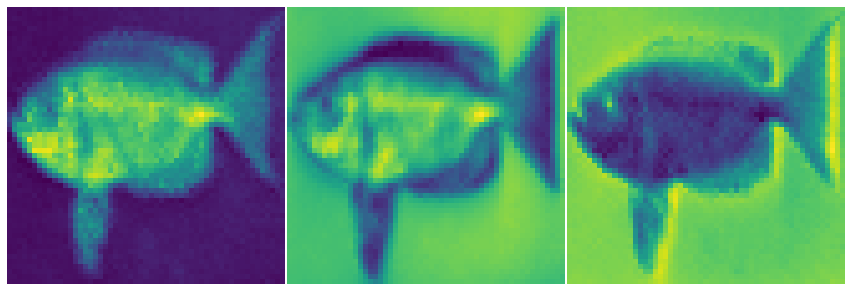

1 Layer:  bn0 Layer shape:  (1, 55, 55, 96)


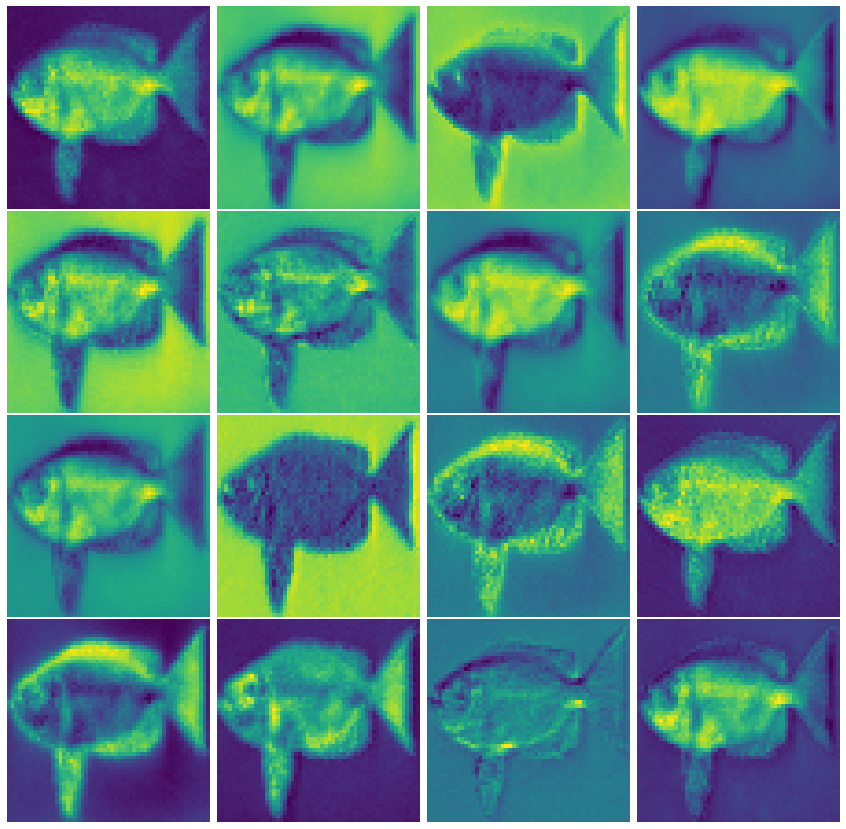

2 Layer:  activation Layer shape:  (1, 55, 55, 96)


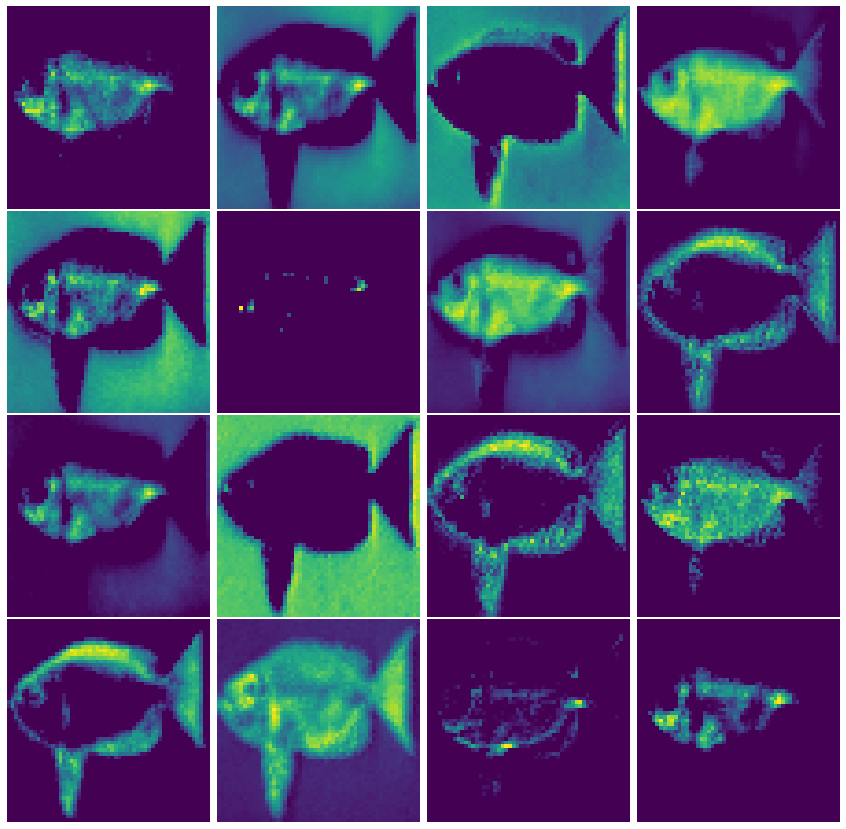

3 Layer:  max0 Layer shape:  (1, 27, 27, 96)


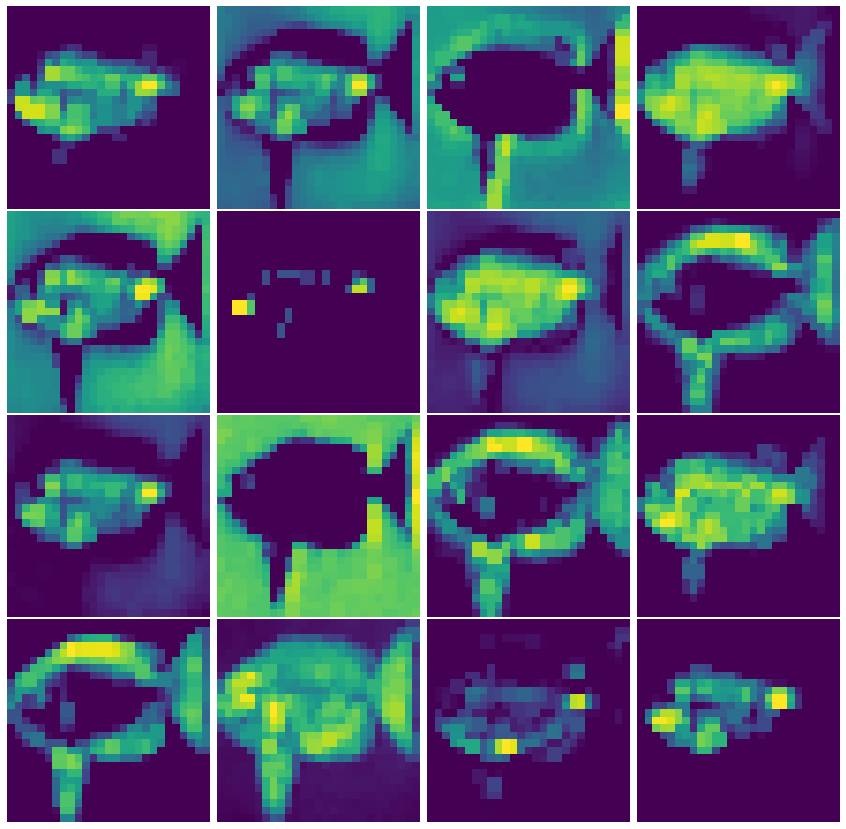

4 Layer:  conv1 Layer shape:  (1, 27, 27, 256)


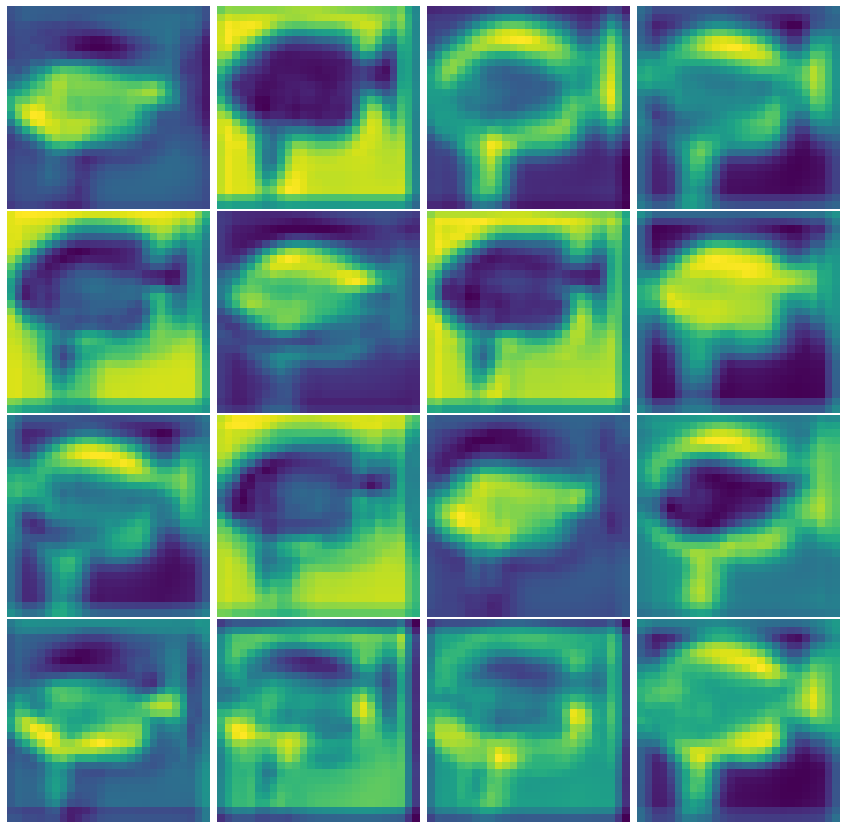

5 Layer:  bn1 Layer shape:  (1, 27, 27, 256)


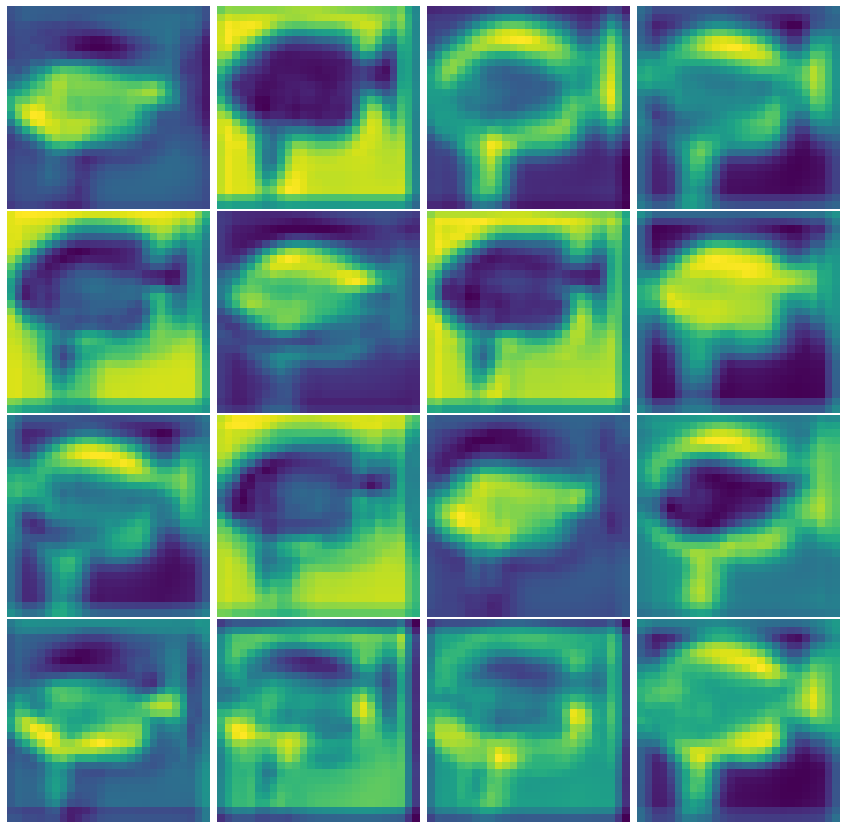

6 Layer:  activation_1 Layer shape:  (1, 27, 27, 256)


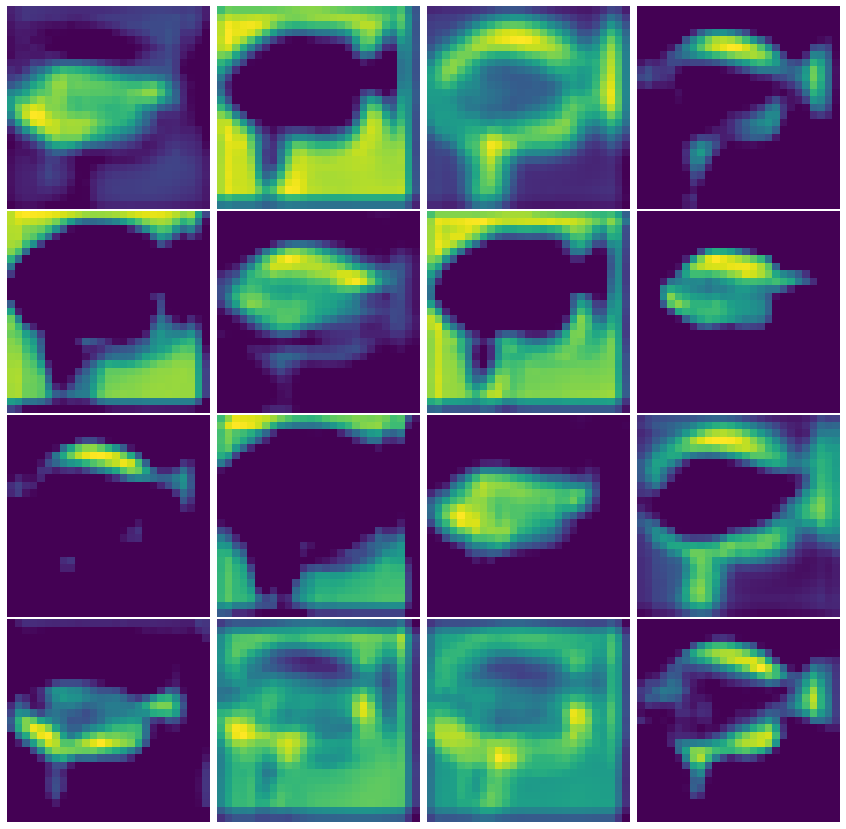

7 Layer:  max1 Layer shape:  (1, 13, 13, 256)


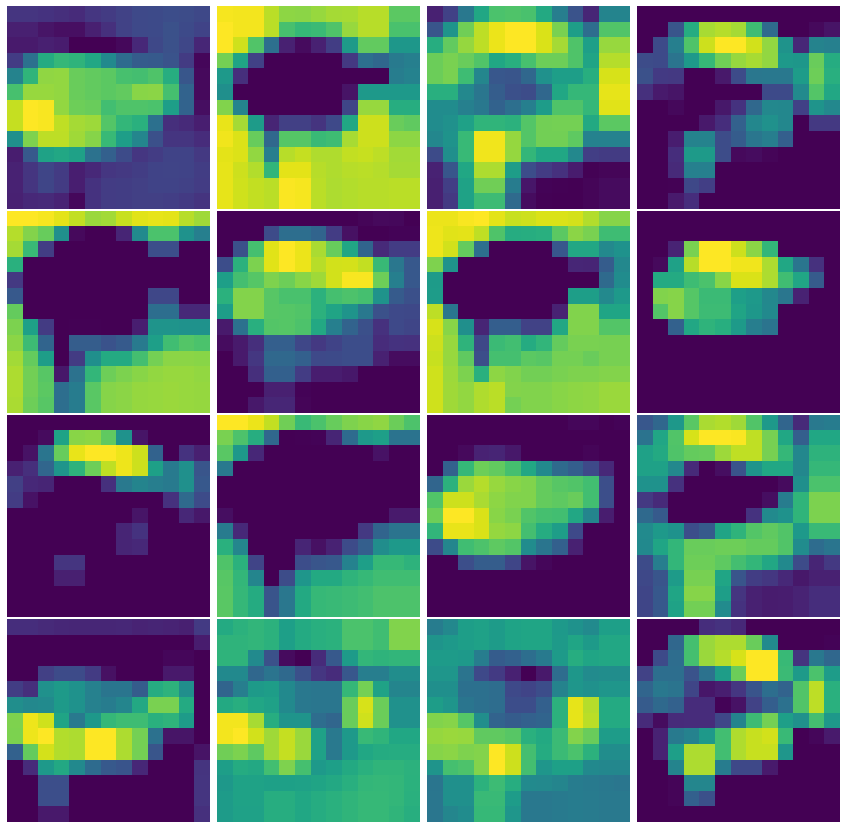

8 Layer:  conv2 Layer shape:  (1, 13, 13, 384)


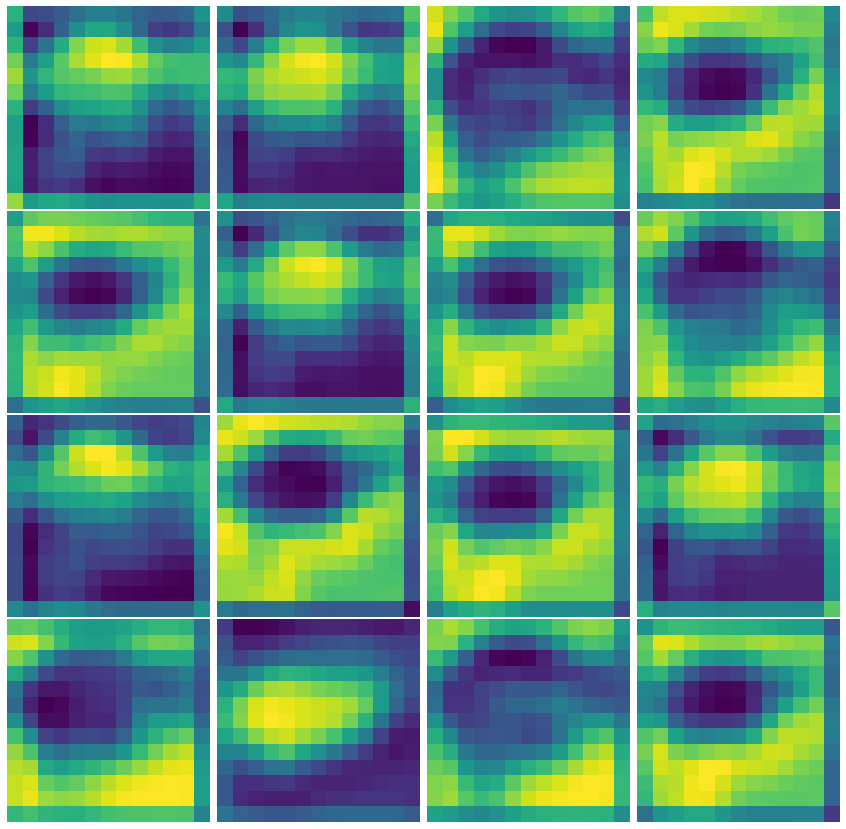

9 Layer:  bn2 Layer shape:  (1, 13, 13, 384)


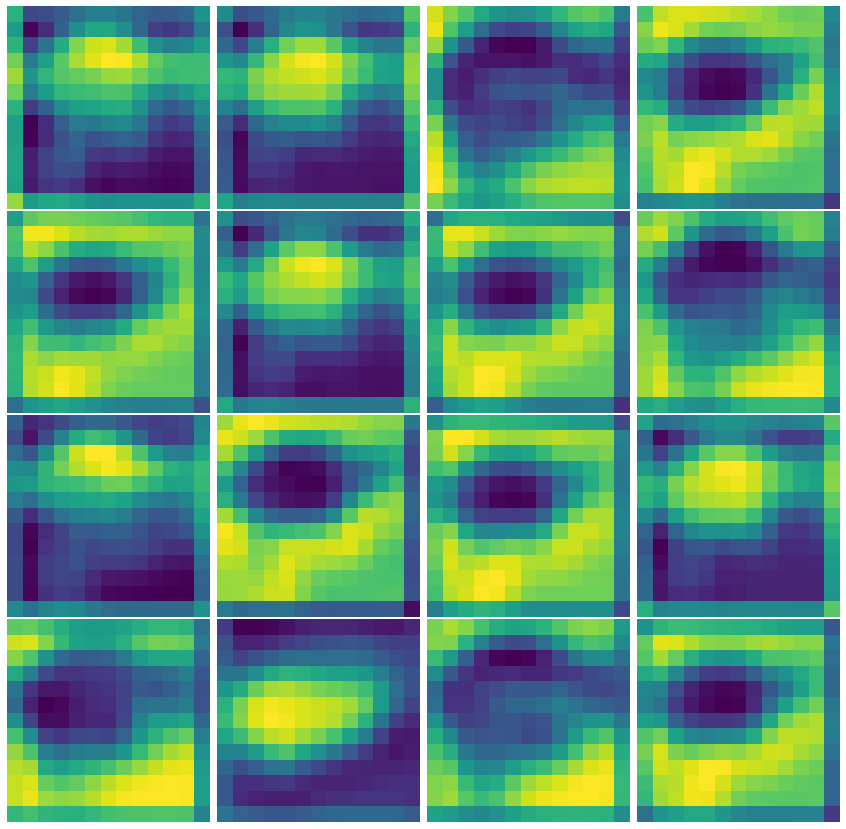

10 Layer:  activation_2 Layer shape:  (1, 13, 13, 384)


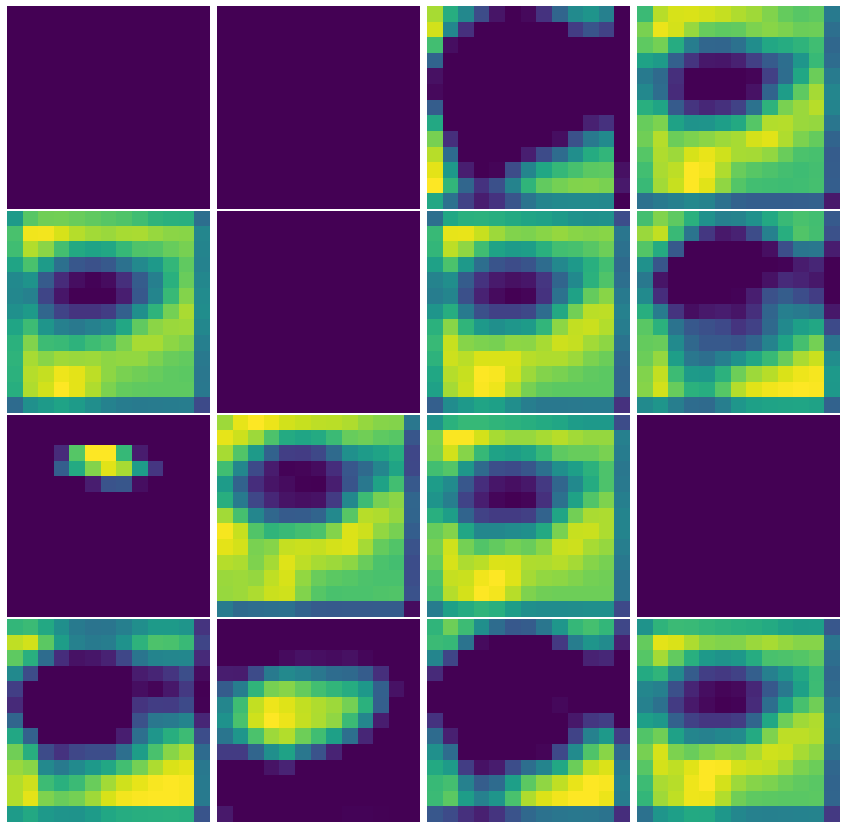

11 Layer:  conv3 Layer shape:  (1, 13, 13, 384)


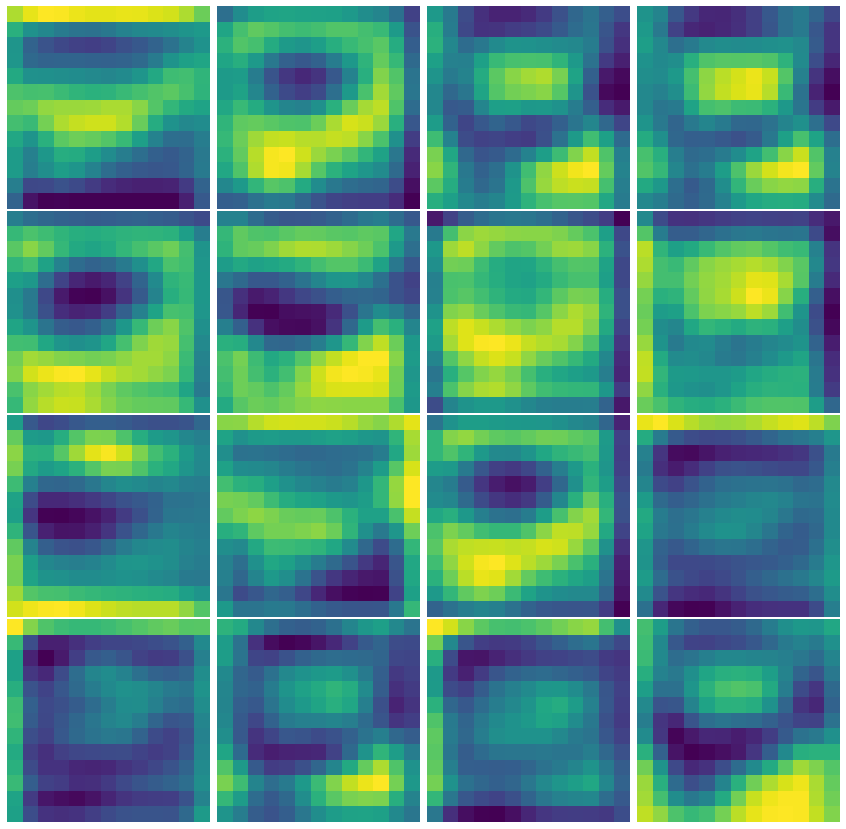

12 Layer:  bn3 Layer shape:  (1, 13, 13, 384)


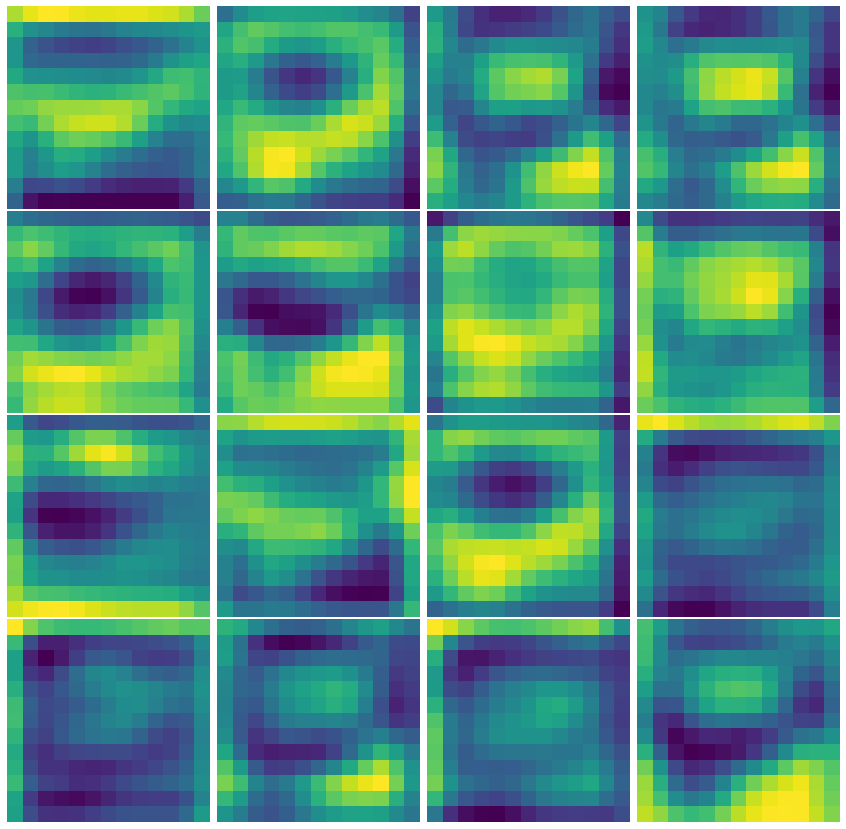

13 Layer:  activation_3 Layer shape:  (1, 13, 13, 384)


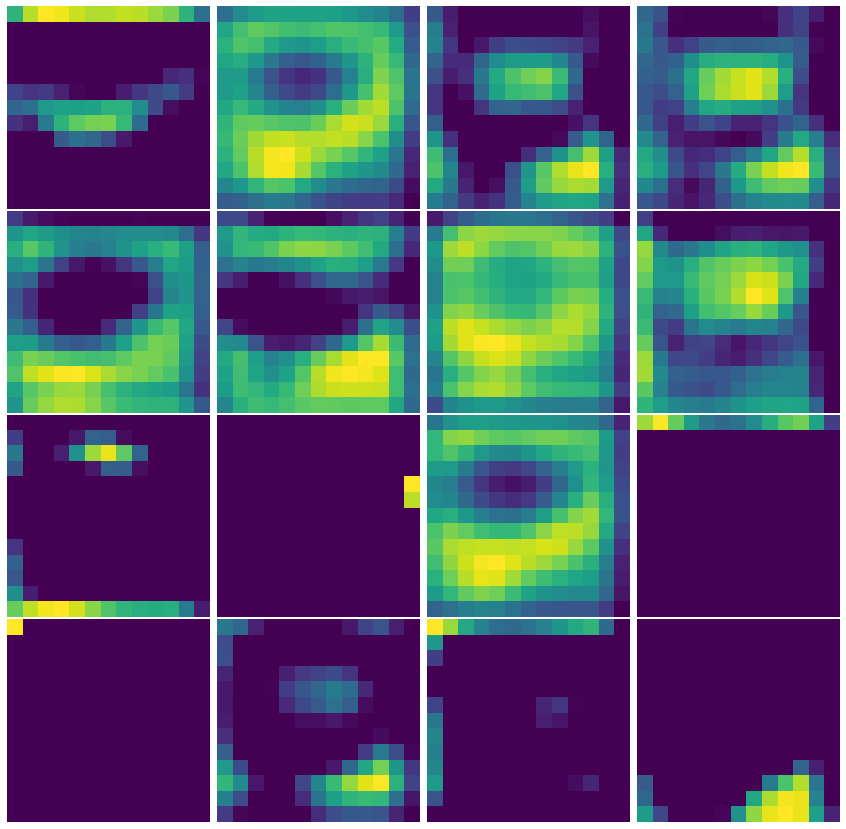

14 Layer:  conv4 Layer shape:  (1, 13, 13, 256)


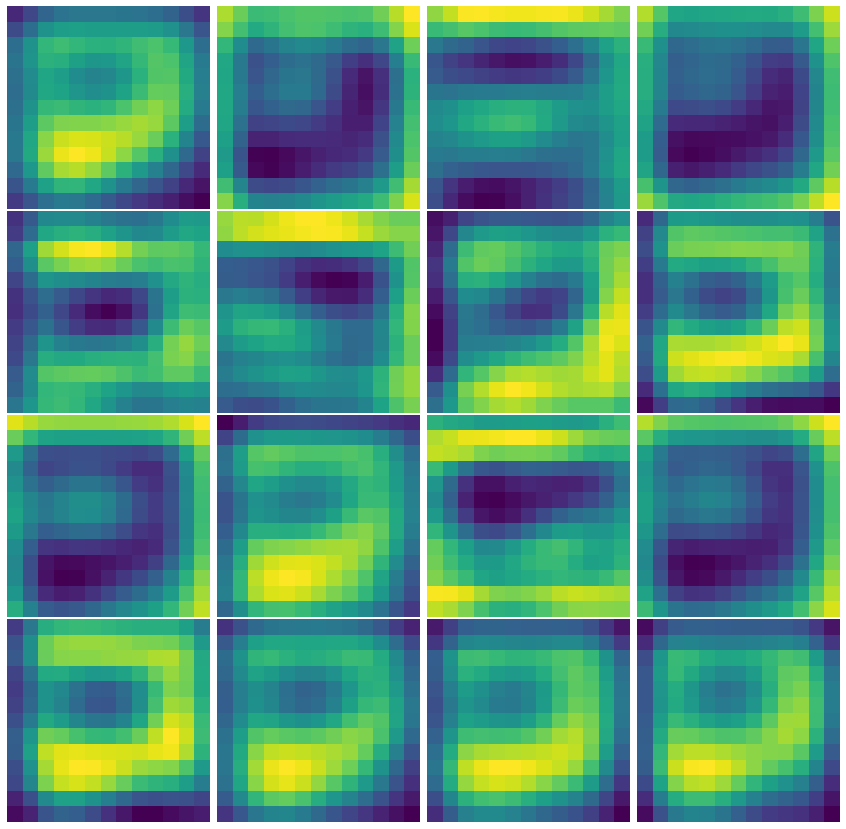

15 Layer:  bn4 Layer shape:  (1, 13, 13, 256)


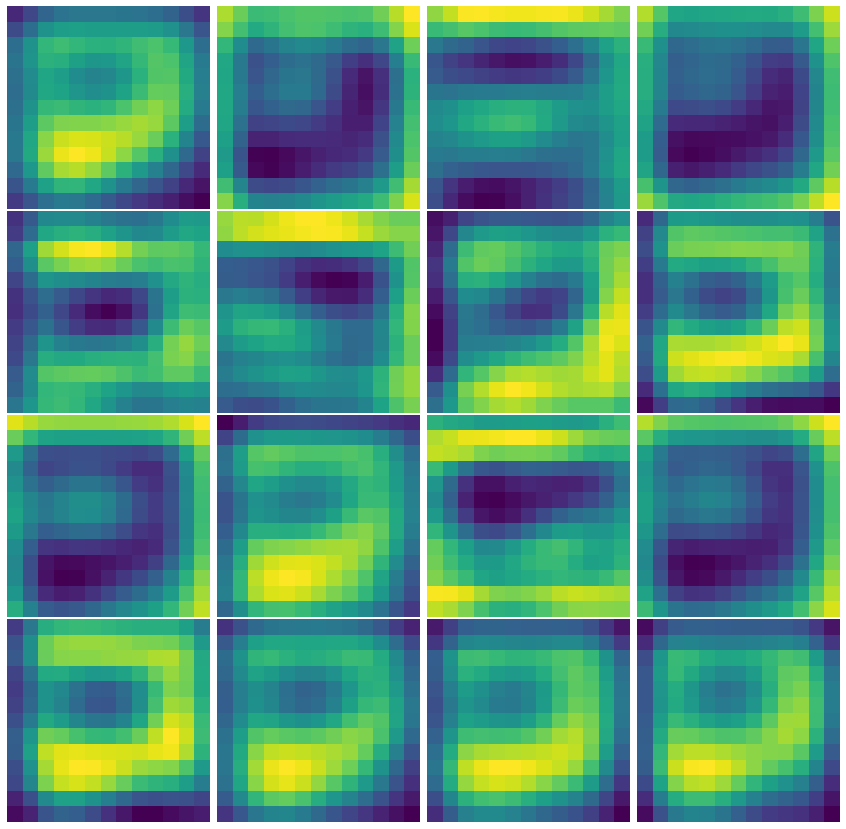

16 Layer:  activation_4 Layer shape:  (1, 13, 13, 256)


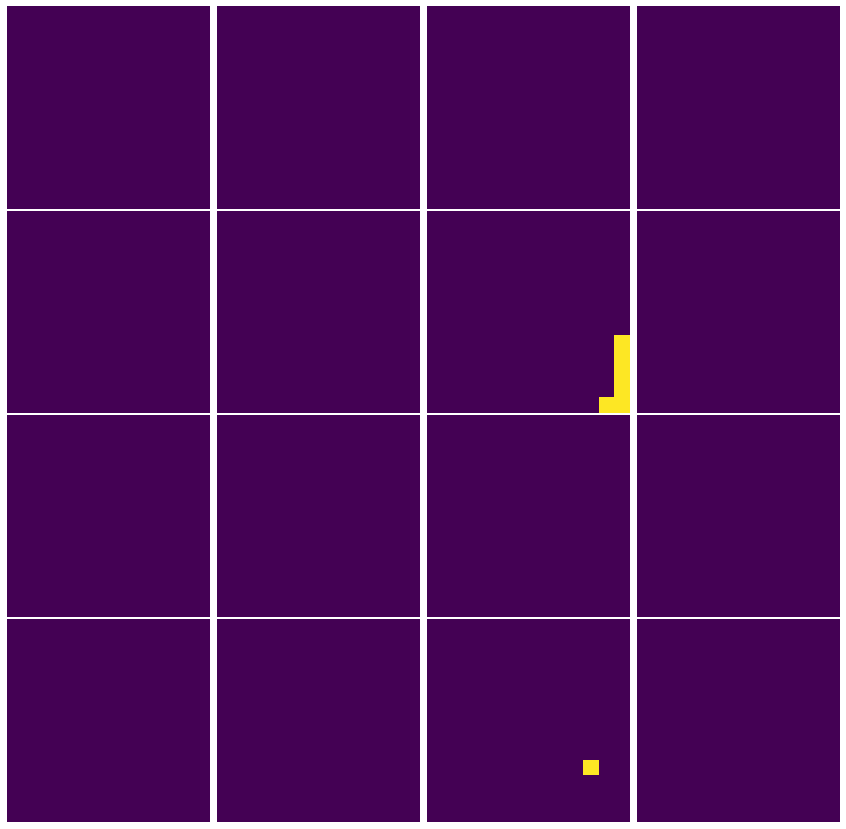

17 Layer:  max2 Layer shape:  (1, 6, 6, 256)


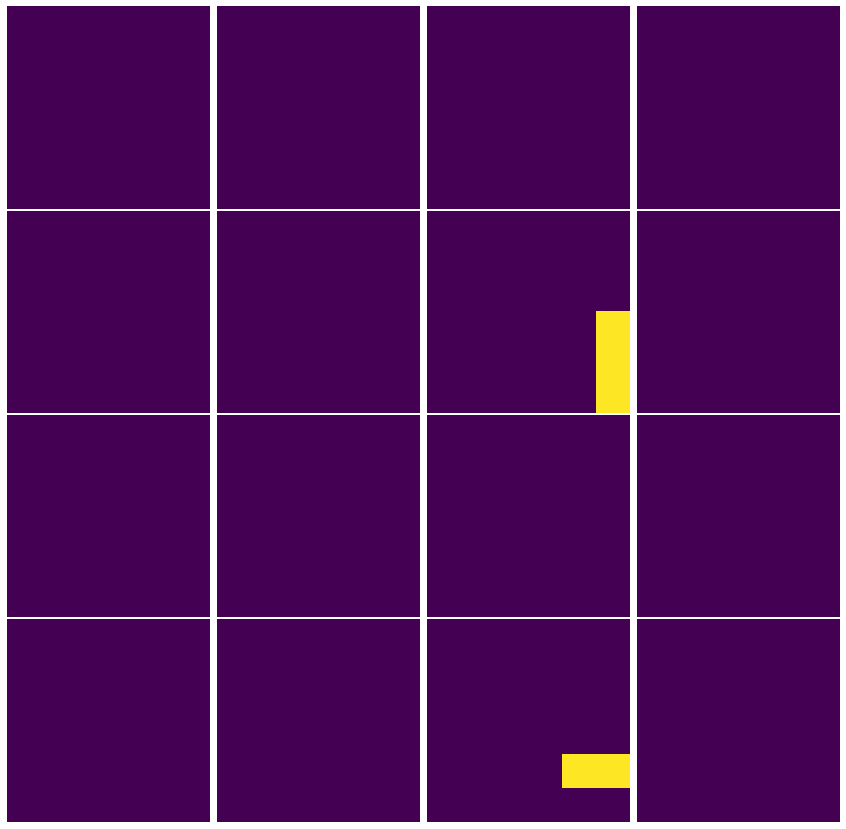

18 Layer:  flatten Layer shape:  (1, 9216)
19 Layer:  fc0 Layer shape:  (1, 4096)
20 Layer:  fc1 Layer shape:  (1, 4096)
21 Layer:  dense Layer shape:  (1, 1000)
22 Layer:  fc2 Layer shape:  (1, 2)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [143]:
for i in range(0, len(extracted_features)):
    print(i, 'Layer: ', layer_names[i], 'Layer shape: ', extracted_features[i].shape)
    plt.figure(figsize=(15,15))
    if(extracted_features[i].ndim == 4):
        features = extracted_features[i]
        imgs = features[0,:,:]
        if(i==0):
            for n in range(3):
                ax = plt.subplot(1,3,n+1)
                plt.imshow(imgs[:,:,n])
                plt.axis('off')
                plt.subplots_adjust(wspace=0.01, hspace=0.01)
        else:
            imgs = extracted_features[i][0,:,:]
            for n in range(16):
                ax = plt.subplot(4,4,n+1)
                plt.imshow(imgs[:,:,n])
                plt.axis('off')
                plt.subplots_adjust(wspace=0.01, hspace=0.01)
        plt.show()